In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [33]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [35]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [37]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
Latest_date = Session.execute("SELECT MAX(date) FROM Measurement").fetchall()

<AxesSubplot:xlabel='date'>

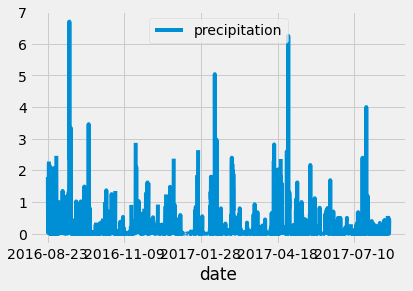

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = Session.query(Measurement.date, Measurement.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
results = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
results = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Sort the dataframe by date
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()



In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number stations in the dataset
Session.query()
Session.query(func.count(Station.station)).all()

[(9,)]

In [42]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Session.query()
Session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
Session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

# Close session

In [15]:
# Close Session
Session.close()

In [16]:
## Precipitation Analysis

In [44]:
#Step 1: Get the latest date
##Method 1: Using session.execute
Latest_date = Session.execute("SELECT MAX(date) FROM Measurement").fetchall()
#print(Latest_date)
##Method 2: Using session.query
Latest_date = Session.query(func.max(Measurement.date)).all()
#print(Latest_date)
End_Date = Latest_date[0][0]
print(End_Date)

2017-08-23


In [45]:
#Step 2: Get the year old date (Last year)
Struct = dt.date.today()
End_Date_dateformat = Struct.replace(year=int(End_Date[:4]),month=int(End_Date[5:7]),day=int(End_Date[8:]))
Last_date_year = End_Date_dateformat - dt.timedelta(days=365)    
Start_Date = Last_date_year.strftime("%Y-%m-%d")
print(Start_Date)

2016-08-23


In [46]:
print("Date range is starting from {} and ending at {}".format(Start_Date,End_Date))

Date range is starting from 2016-08-23 and ending at 2017-08-23


In [47]:
#Step 3: Perform a query to get the precipitation data for 1 year(as per the DB) (In desc order of date)
PRCP_data = Session.query(Measurement.date,Measurement.prcp)\
                          .filter(Measurement.date <= End_Date)\
                          .filter(Measurement.date >= Start_Date)\
                          .order_by(Measurement.date.desc()).all()
# for data in PRCP_data: 
#     print(data)

In [48]:
#Step 4: Save the query results as a Pandas DataFrame and set the index to the date column
PRCP_data_DF = pd.DataFrame(PRCP_data).rename(columns={"date":"Date","prcp":"Precipitation Score"})
PRCP_data_DF.set_index("Date",inplace=True)
PRCP_data_DF.head()

,Precipitation Score
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


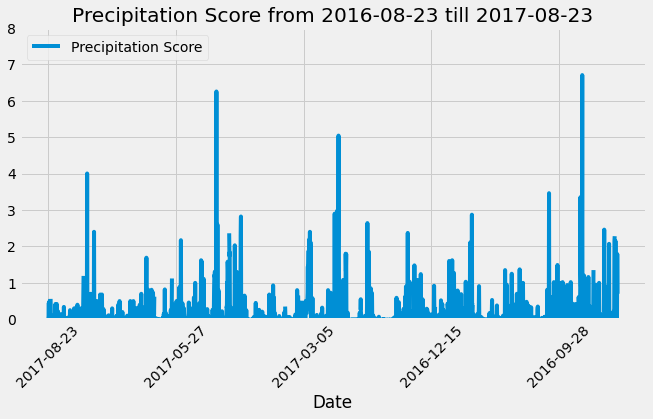

In [49]:
#Step 5: Plot the results using the DataFrame plot method.
PRCP_data_DF.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation Score from {Start_Date} till {End_Date}',\
                  label="Precipitation",rot=45)
plt.legend(loc="upper left")
plt.show()

In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data
PRCP_data_DF.describe()

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [51]:
## Station Analysis

In [52]:
#Step1: Query to find the count the number of stations
Total_stations = Session.query(Station).count()
print('Total number of stations is: {}'.format(Total_stations))

Total number of stations is: 9


In [58]:
# What are the most active stations?
# List the stations and the counts in descending order.
Session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)
#add order by also, left column is station id with the right being the counts for each station- 
#showing us which station is most active
Session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
Station_Highest_Obs = Session.query(Measurement.station,func.count(Measurement.station))\
                      .group_by(Measurement.station)\
                      .order_by(desc(func.count(Measurement.station))).first()
#print("\n**Using session.query and concatenating strings for printing**")
#Station_Highest_Obs  
print("The station with the highest number of observations is "+str(Station_Highest_Obs[0])+" with " +\
      str(Station_Highest_Obs[1]) + " observations.")

The station with the highest number of observations is USC00519281 with 2772 observations.


In [55]:
#Step5: Query to calculate the lowest temperature recorded, highest temperature recorded, \
# and average temperature for the most active station.
Session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station_Highest_Obs[0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [56]:
#create query for temp observations    - then put into data frame - histogram is in cell below
results = Session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


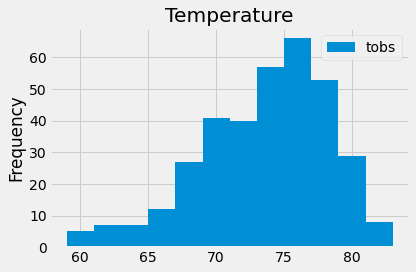

In [57]:
#Step8: Plot the results as a histogram
df.plot.hist(bins=12, title=f"Temperature")
plt.tight_layout()

In [115]:
# Close Session
Session.close()